In [1]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas import DataFrame
from scipy.optimize import minimize
random.seed(0)

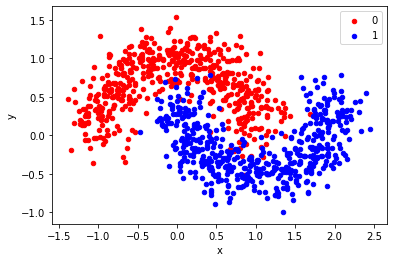

In [2]:
# create a synthetic dataset 
'''
DO NOT CHANGE BELOW CODE 
'''


from sklearn.datasets import make_moons

num_observation = 1000
X, y = make_moons(n_samples=num_observation, noise=0.20, 
    random_state=0)
    
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()

grouped = df.groupby('label')
#plt.figure()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
def sigmoid(z):
    '''
    @z : value to pass to the model
    return : the sigmoid value
    '''
    return(1 / (1 + np.exp(-z)))

In [4]:
# create a function for prediction 
def predict(X, theta):
    '''
    @parameter1: input feature set
    @parameter2: model coefficients
    Does: calculate the dot product
    return: the dot product value
    '''
    return(sigmoid(X.dot(theta)))

In [5]:
def cost_function(theta, X, y, _lambda = 0.01):
    '''
    @parameters: theta, input features , target vector
    Does: calculate the cost of the model
    return: the cost value
    '''
    m = y.size
    grad = np.zeros(theta.shape)

    h=predict(X,theta)
    term1=-y.dot(np.log(h))
    term2=(1-y).dot(np.log(1-h))
    term3=(_lambda/(2*m))*(theta[1:].dot(theta[1:])) 
    cost=(term1-term2)/m+term3

    return(cost)

In [6]:
def gradient_descent(theta, X, y, _lambda = 0.01):
    '''
    @parameters: theta, input features , target vector
    Does: calculate the gradient given the parameters
    return: the gradient 
    '''
    h = predict(X,theta)
    grad=(h-y).dot(X)/m
    grad[1:]+=(_lambda/m)*theta[1:]
    return grad

In [7]:
# using sklearn create the dataset with PolynomialFeatures degree 6
df = np.asanyarray(df)  
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
XX = poly.fit_transform(X)
poly_nomial_data = XX

In [8]:
# DO NOT CHANGE BELOW CODE 
m, n = poly_nomial_data.shape
initial_theta = np.zeros(n)
learning_rate = 0.01

In [9]:
# DO NOT CHANGE BELOW CODE 
def plotData(data, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes, object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=30, 
    	linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=30, label=label_neg)
    axes.legend(frameon= True, fancybox = True);


/Users/sunquanhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/sunquanhan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


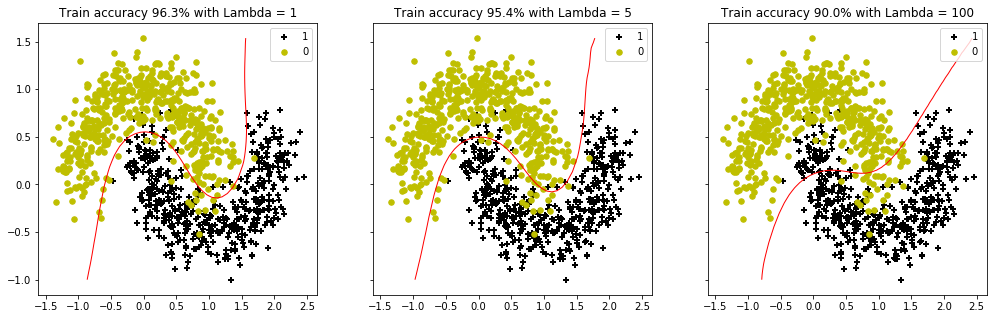

In [10]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))


'''
Using following lambda variables [1, 5, 100] and learning rate of 0.01, iterate 
over your polynomial dataset and calculate the weights for each given lambda. 
Then using the function plotData plot your dataset and the decision boundary. 
'''

for i, c in enumerate([1, 5, 100]): 
    m, n = XX.shape
    learning_rate = 0.01
    initial_theta = np.zeros(n)
    for j in range(100000):
        cost = cost_function(initial_theta,XX,y,c)
        grad = gradient_descent(initial_theta,XX,y,c)
        initial_theta -= learning_rate*grad
    # calculate accuracy and save it in variable names accuracy using threshold 
    # of 0.5 for your predictions 
    # Your code goes here
	# TODO: YOUR CODE GOES HERE
    p = sigmoid(XX.dot(initial_theta.T)) >= 0.5  
    accuracy = 100*sum(p.astype('int') == y.ravel())/y.size
    plotData(df, 1, 0, axes.flatten()[i])
    # Plot decision boundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min,
    	 x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), 
    	xx2.ravel()]).dot(initial_theta))
    h = h.reshape(xx1.shape)
    
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='r');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), c))

